In [1]:
%matplotlib inline
import argparse
import glob
import logging
import os
import pickle
import random
import re
import csv
from typing import Dict, List, Tuple
import numpy as np
from scipy import stats
# from termcolor import colored
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict

In [2]:
for test_idx in range(0, 20):
    influence_list = pickle.load(open(f'GC_outputs/influence_test_idx_{test_idx}.pkl', 'rb'))
    print("test idx:", test_idx, " -- most influential train idx:", np.argsort(influence_list)[::-1][:10])

test idx: 0  -- most influential train idx: [  64 3384 4935 5589 5104  135 6525 3810 3904 3639]
test idx: 1  -- most influential train idx: [ 300 3430 4990 1754  626 5086 3964 5361 4143 2092]
test idx: 2  -- most influential train idx: [  64 3384 5589 5309 4872 1795 4935 4127 3639 4176]
test idx: 3  -- most influential train idx: [2239 2617 5428 4896 3002 3776 3347 1607 5741 1870]
test idx: 4  -- most influential train idx: [6776 5981 1816 4243 4139  919 6011 2274 1404 5247]
test idx: 5  -- most influential train idx: [4284 1444 1814 3768 3433 5188 5920 2359 4994 4627]
test idx: 6  -- most influential train idx: [ 300 3430 4990 1754 5361 3964 5086 2092  626 6927]
test idx: 7  -- most influential train idx: [  64 3384 4176 2171 4872 5970  991 4127 4274 5589]
test idx: 8  -- most influential train idx: [  64 1960 3384 3810 3639 4872 5970 4935 4176  645]
test idx: 9  -- most influential train idx: [ 300 3430 1754 4990 5086 5361 3964 2092 1630 4143]
test idx: 10  -- most influential train 

In [3]:
for test_idx in range(0, 20):
    influence_list = pickle.load(open(f'GC_nocontra_outputs/influence_test_idx_{test_idx}.pkl', 'rb'))
    print("test idx:", test_idx, " -- most influential train idx:", np.argsort(influence_list)[::-1][:10])

test idx: 0  -- most influential train idx: [3099 3917   91 3179 5723 1452 1061 3414 4338  315]
test idx: 1  -- most influential train idx: [5374 4956 4757  170 6346 3383 2486 6289 5421 1700]
test idx: 2  -- most influential train idx: [  11 5932 4681 1795 4176 3977 2171 2095 4274 6779]
test idx: 3  -- most influential train idx: [5605 2417 6322 4293  498 1097 4492 5878 3469  572]
test idx: 4  -- most influential train idx: [4766 6011 6526 5981 5581 4094 6227 2959 6720   36]
test idx: 5  -- most influential train idx: [5863   52 3582 6886 6072 6743 5352 6128   54 6786]
test idx: 6  -- most influential train idx: [3105 3202 6730 2252  635 2681  388  576 3480 6633]
test idx: 7  -- most influential train idx: [3492 1346 2800 6525 5053 3059 4157  620 4432 2990]
test idx: 8  -- most influential train idx: [ 192 6965 4511 4621 1764 6680 6438 2663 5963 4942]
test idx: 9  -- most influential train idx: [3099  576 3074 2589 3046 2070 5450 6157  486 4381]
test idx: 10  -- most influential train 

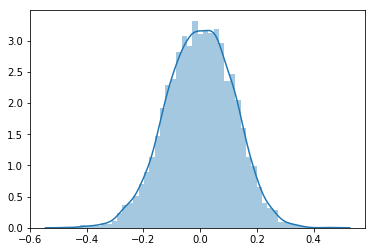

In [4]:
test_idx = 0

influence_list = pickle.load(open(f'GC_outputs/influence_test_idx_{test_idx}.pkl', 'rb'))
sns.distplot(influence_list)

In [5]:
test_idx_lb = 0
test_idx_ub = 20
influence_file_dir = 'GC_outputs/'

top_1_inf_ex_set = set()
top_10_inf_ex_set = set()

for test_idx in range(test_idx_lb, test_idx_ub):
    influence_list = pickle.load(open(f'{influence_file_dir}influence_test_idx_{test_idx}.pkl', 'rb'))
    inf_sorted_idx = list(np.argsort(influence_list))
    inf_sorted_idx.reverse()
    for _i, isi in enumerate(inf_sorted_idx):
        if _i < 1:
            top_1_inf_ex_set.add(isi)
        if _i < 10:
            top_10_inf_ex_set.add(isi)

print('Top-1 set cardinality:', len(top_1_inf_ex_set), f'({test_idx_ub - test_idx_lb} test examples)')
print('Top-10 set cardinality:', len(top_10_inf_ex_set), f'({test_idx_ub - test_idx_lb} test examples)')

Top-1 set cardinality: 11 (20 test examples)
Top-10 set cardinality: 120 (20 test examples)


In [6]:
test_idx_lb = 0
test_idx_ub = 20
influence_file_dir = 'GC_nocontra_outputs/'

top_1_inf_ex_set = set()
top_10_inf_ex_set = set()

for test_idx in range(test_idx_lb, test_idx_ub):
    influence_list = pickle.load(open(f'{influence_file_dir}influence_test_idx_{test_idx}.pkl', 'rb'))
    inf_sorted_idx = list(np.argsort(influence_list))
    inf_sorted_idx.reverse()
    for _i, isi in enumerate(inf_sorted_idx):
        if _i < 1:
            top_1_inf_ex_set.add(isi)
        if _i < 10:
            top_10_inf_ex_set.add(isi)

print('Top-1 set cardinality:', len(top_1_inf_ex_set), f'({test_idx_ub - test_idx_lb} test examples)')
print('Top-10 set cardinality:', len(top_10_inf_ex_set), f'({test_idx_ub - test_idx_lb} test examples)')

Top-1 set cardinality: 19 (20 test examples)
Top-10 set cardinality: 193 (20 test examples)
